# Normal equation with Numpy

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Generation

In [8]:
np.random.seed(0)
m = 100
X = 10 * np.random.rand(m)
vrai_theta0 = 4
vrai_theta1 = 3
bruit = np.random.randn(m)
y = vrai_theta0 + vrai_theta1 * X + bruit

# Let's add a column of ones to X to account for theta0 (intercept)
X_b = np.c_[np.ones((m, 1)), X.reshape(m, 1)]  
# np.c_ is used to concatenate arrays column-wise
# it's similar to using np.column_stack() or np.hstack()

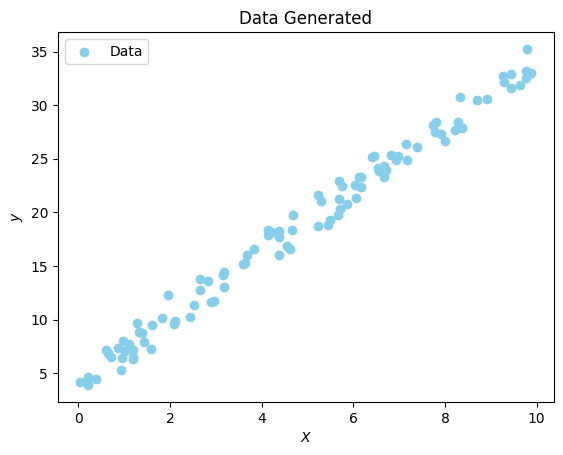

In [9]:
# Visualisation des données
plt.scatter(X, y, color='skyblue', label='Data')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.title('Data Generated')
plt.legend()
plt.show()

## 2. Linear Regression using Normal Equations

In [10]:
def normal_eq(X, y):
    """ 
    Calculate θ = (X^T X)^(-1) X^T y
    - X: matrice (m, 2) including bias columns
    - y : vecteur (m,)
    Return θ (size 2 vector)
    """
    
    XtX = X.T.dot(X) # X^T X, matrix (2,2)
    XtX_inv = np.linalg.inv(XtX) # matrix inversion (2,2)
    XtY = X.T.dot(y)  # X^T y, vector (2,)
    theta_best = XtX_inv.dot(XtY) # multiplication (2,2) × (2,) → (2,)
    return theta_best

In [11]:
# Calculate theta using the normal equation
theta_eq = normal_eq(X_b, y)

## 3. Printing best parameters founded

In [12]:
print("Normal equation parametors :")
print(f"θ₀ = {theta_eq[0]:.4f}")
print(f"θ₁ = {theta_eq[1]:.4f}")

Normal equation parametors :
θ₀ = 4.2222
θ₁ = 2.9937


## 4. Visualization: data and adjusted line

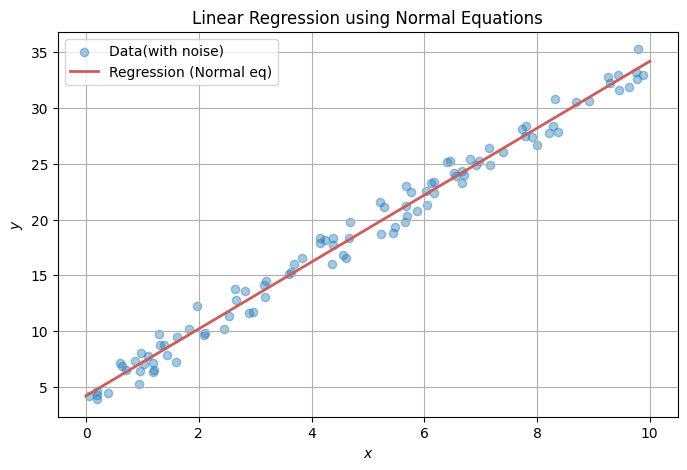

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data(with noise)", alpha=0.4)
x_tracé = np.array([0, 10])
y_tracé = theta_eq[0] + theta_eq[1] * x_tracé
plt.plot(x_tracé, y_tracé, linewidth=2, label="Regression (Normal eq)", color='indianred')
plt.title("Linear Regression using Normal Equations")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid(True)
plt.show()